In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("trainv1.csv", encoding="ISO-8859-1")

In [3]:
df=df.drop(columns=["State","RescuerID","PetID"])

In [4]:
df.dtypes

Type              int64
Name             object
Age               int64
Breed1            int64
Breed2            int64
Gender            int64
Color1            int64
Color2            int64
Color3            int64
MaturitySize      int64
FurLength         int64
Vaccinated        int64
Dewormed          int64
Sterilized        int64
Health            int64
Quantity          int64
Fee               int64
VideoAmt          int64
Description      object
PhotoAmt          int64
AdoptionSpeed     int64
dtype: object

In [5]:
df.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,8.000000,30.000000,4.000000


In [6]:
df.Type = df.Type.astype('category')
df["Name"]=pd.DataFrame([1 if x is None else 0 for x in df["Name"]])
df.Name =df.Name.astype("category")

In [7]:
df["Description"]=pd.DataFrame([len(str(x)) for x in df["Description"]])
df["Description"].astype("int64").dtypes

dtype('int64')

In [8]:
df.Breed1 = df.Breed1.astype('category')
df.Breed2 = df.Breed2.astype('category')
df.Gender = df.Gender.astype('category')
df.Color1 = df.Color1.astype('category')
df.Color2 = df.Color2.astype('category')
df.Color3 = df.Color3.astype('category')

In [9]:
print(df[df.MaturitySize == 0].MaturitySize.value_counts(),'\n\n', 
      df[df.FurLength == 0].FurLength.value_counts(),'\n\n')

Series([], Name: MaturitySize, dtype: int64) 

 Series([], Name: FurLength, dtype: int64) 




In [10]:
print(df[df.Vaccinated == 3].Vaccinated.value_counts(),'\n\n',
df[df.Sterilized == 3].Sterilized.value_counts(),'\n\n',
df[df.Dewormed == 3].Dewormed.value_counts(),'\n\n',df[df.Health == 3].Health.value_counts(),'\n\n')

3    1868
Name: Vaccinated, dtype: int64 

 3    1815
Name: Sterilized, dtype: int64 

 3    1781
Name: Dewormed, dtype: int64 

 3    34
Name: Health, dtype: int64 




In [11]:
df.Vaccinated = df.Vaccinated.astype('category')
df.Dewormed = df.Dewormed.astype('category')
df.Sterilized = df.Sterilized.astype('category')
df.Health = df.Health.astype('category')

In [12]:
print(df.dtypes)

Type             category
Name             category
Age                 int64
Breed1           category
Breed2           category
Gender           category
Color1           category
Color2           category
Color3           category
MaturitySize        int64
FurLength           int64
Vaccinated       category
Dewormed         category
Sterilized       category
Health           category
Quantity            int64
Fee                 int64
VideoAmt            int64
Description         int64
PhotoAmt            int64
AdoptionSpeed       int64
dtype: object


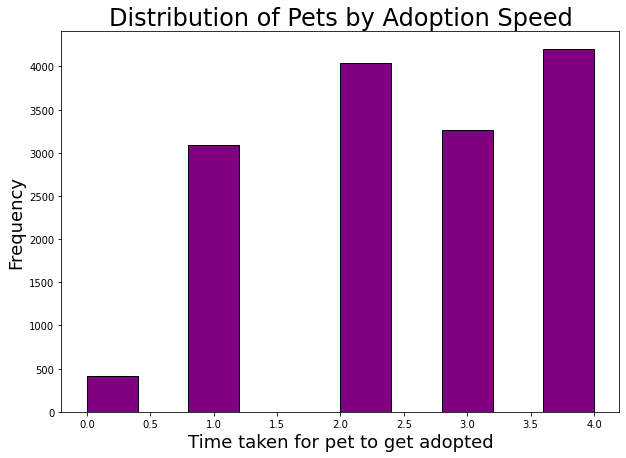

In [13]:
import matplotlib.pyplot as plt
df.AdoptionSpeed.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Pets by Adoption Speed', size=24)
plt.xlabel('Time taken for pet to get adopted', size=18)
plt.ylabel('Frequency', size=18)
plt.show()

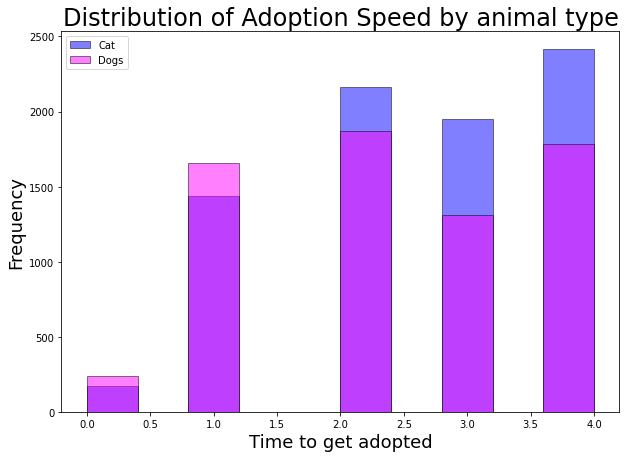

In [14]:
df[df['Type'] == 1].AdoptionSpeed.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7))
df[df['Type'] == 2].AdoptionSpeed.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Cat', 'Dogs'])
plt.title('Distribution of Adoption Speed by animal type', size=24)
plt.xlabel('Time to get adopted', size=18)
plt.ylabel('Frequency', size=18);

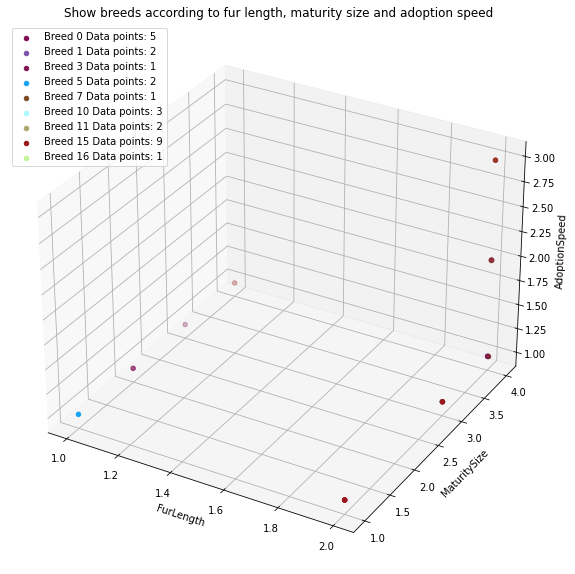

In [15]:
import random as random
import numpy as np
X=df[["FurLength","MaturitySize","AdoptionSpeed"]]
Y=pd.to_numeric(df["Breed1"]).values

fig = plt.figure(figsize=(25,10))
ax = plt.axes(projection='3d')

for i in np.unique(Y):
    if (i<17):
     zdata = X.iloc[Y==i,0].values
     xdata = X.iloc[Y==i,1].values
     ydata = X.iloc[Y==i,2].values
     ax.scatter3D(xdata, ydata, zdata, color=np.random.rand(3,),label="Breed "+str(i)+" Data points: "+str(list(df[df.Breed1 == i].Breed1.value_counts())[0]))
    
ax.set_title('Show breeds according to fur length, maturity size and adoption speed');
ax.set_xlabel(X.columns[0])
ax.set_ylabel(X.columns[1])
ax.set_zlabel(X.columns[2]);
plt.legend()
plt.show()
    


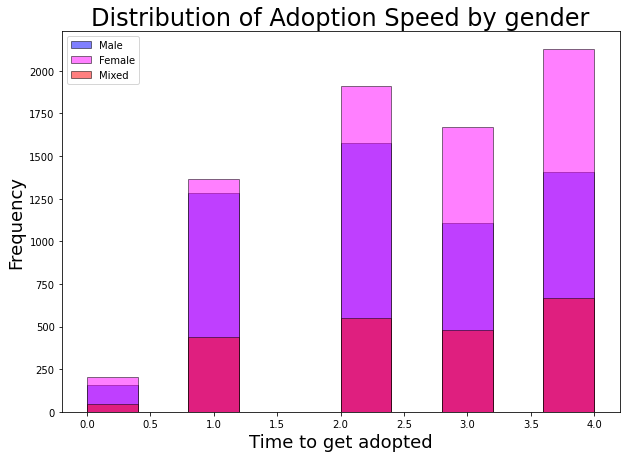

In [16]:
df[df['Gender'] == 1].AdoptionSpeed.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7))
df[df['Gender'] == 2].AdoptionSpeed.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7))
df[df['Gender'] == 3].AdoptionSpeed.plot(kind='hist', color='red', edgecolor='black', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Male', 'Female','Mixed'])
plt.title('Distribution of Adoption Speed by gender', size=24)
plt.xlabel('Time to get adopted', size=18)
plt.ylabel('Frequency', size=18);

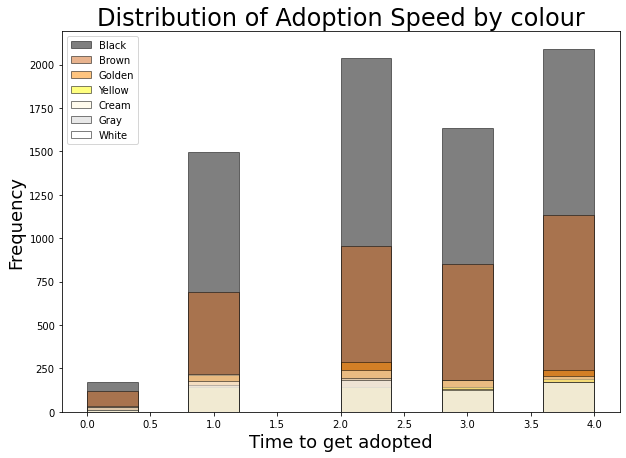

In [17]:
df[df['Color1'] == 1].AdoptionSpeed.plot(kind='hist', color='black', edgecolor='black', alpha=0.5, figsize=(10, 7))
df[df['Color1'] == 2].AdoptionSpeed.plot(kind='hist', color='chocolate', edgecolor='black', alpha=0.5, figsize=(10, 7))
df[df['Color1'] == 3].AdoptionSpeed.plot(kind='hist', color='darkorange', edgecolor='black', alpha=0.5, figsize=(10, 7))
df[df['Color1'] == 4].AdoptionSpeed.plot(kind='hist', color='yellow', edgecolor='black', alpha=0.5, figsize=(10, 7))
df[df['Color1'] == 5].AdoptionSpeed.plot(kind='hist', color='cornsilk', edgecolor='black', alpha=0.5, figsize=(10, 7))
df[df['Color1'] == 6].AdoptionSpeed.plot(kind='hist', color='lightgrey', edgecolor='black', alpha=0.5, figsize=(10, 7))
df[df['Color1'] == 7].AdoptionSpeed.plot(kind='hist', color='white', edgecolor='black', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Black', 'Brown','Golden','Yellow','Cream','Gray','White'])
plt.title('Distribution of Adoption Speed by colour', size=24)
plt.xlabel('Time to get adopted', size=18)
plt.ylabel('Frequency', size=18);

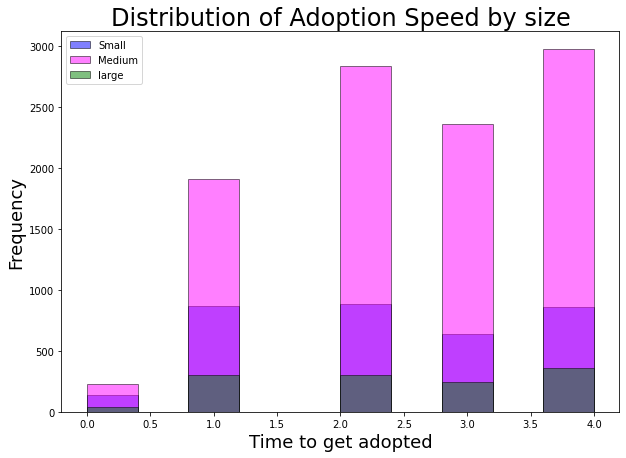

In [18]:
df[df['MaturitySize'] == 1].AdoptionSpeed.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7))
df[df['MaturitySize'] == 2].AdoptionSpeed.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7))
df[df['MaturitySize'] == 3].AdoptionSpeed.plot(kind='hist', color='green', edgecolor='black', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Small', 'Medium','large'])
plt.title('Distribution of Adoption Speed by size', size=24)
plt.xlabel('Time to get adopted', size=18)
plt.ylabel('Frequency', size=18);

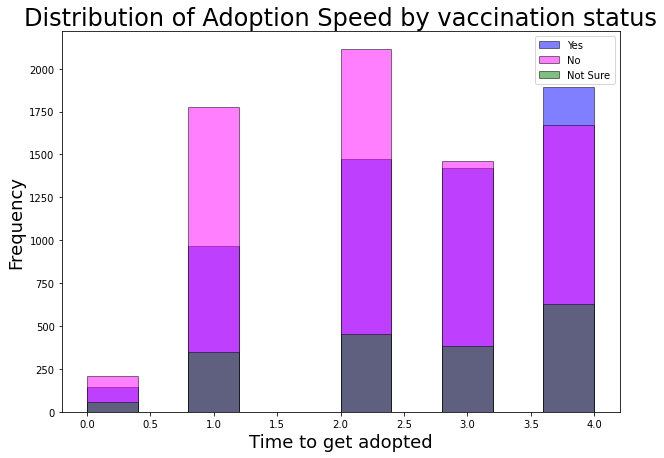

In [19]:
df[df['Vaccinated'] == 1].AdoptionSpeed.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7))
df[df['Vaccinated'] == 2].AdoptionSpeed.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7))
df[df['Vaccinated'] == 3].AdoptionSpeed.plot(kind='hist', color='green', edgecolor='black', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Yes', 'No','Not Sure'])
plt.title('Distribution of Adoption Speed by vaccination status', size=24)
plt.xlabel('Time to get adopted', size=18)
plt.ylabel('Frequency', size=18);

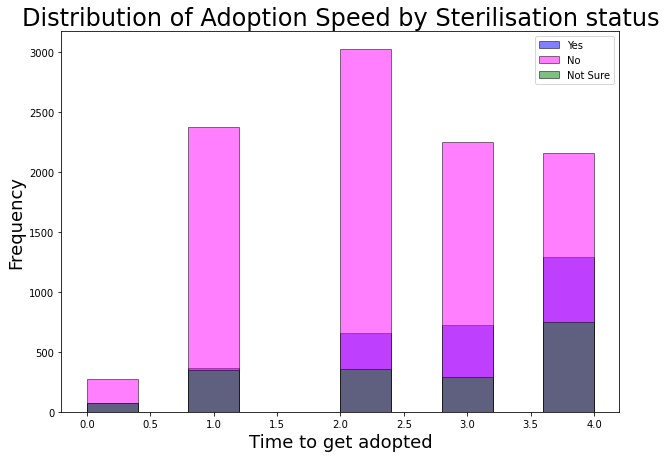

In [20]:
df[df['Sterilized'] == 1].AdoptionSpeed.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7))
df[df['Sterilized'] == 2].AdoptionSpeed.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7))
df[df['Sterilized'] == 3].AdoptionSpeed.plot(kind='hist', color='green', edgecolor='black', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Yes', 'No','Not Sure'])
plt.title('Distribution of Adoption Speed by Sterilisation status', size=24)
plt.xlabel('Time to get adopted', size=18)
plt.ylabel('Frequency', size=18);

In [21]:
df=df.drop(columns=["Breed1","Breed2","Color2","Color3"])

In [22]:
df = pd.get_dummies(df, columns=['Type','Gender', 'Color1', 'Vaccinated', 'Dewormed','Sterilized','Health'],drop_first=True)

In [23]:
from sklearn import preprocessing

df_arr = df.values
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df_arr)
df = pd.DataFrame(df_scaled, columns=df.columns)
df = df[[c for c in df if c != 'AdoptionSpeed'] 
       + ['AdoptionSpeed']]

In [24]:
df.columns

Index(['Name', 'Age', 'MaturitySize', 'FurLength', 'Quantity', 'Fee',
       'VideoAmt', 'Description', 'PhotoAmt', 'Type_2', 'Gender_2', 'Gender_3',
       'Color1_2', 'Color1_3', 'Color1_4', 'Color1_5', 'Color1_6', 'Color1_7',
       'Vaccinated_2', 'Vaccinated_3', 'Dewormed_2', 'Dewormed_3',
       'Sterilized_2', 'Sterilized_3', 'Health_2', 'Health_3',
       'AdoptionSpeed'],
      dtype='object')

<AxesSubplot:>

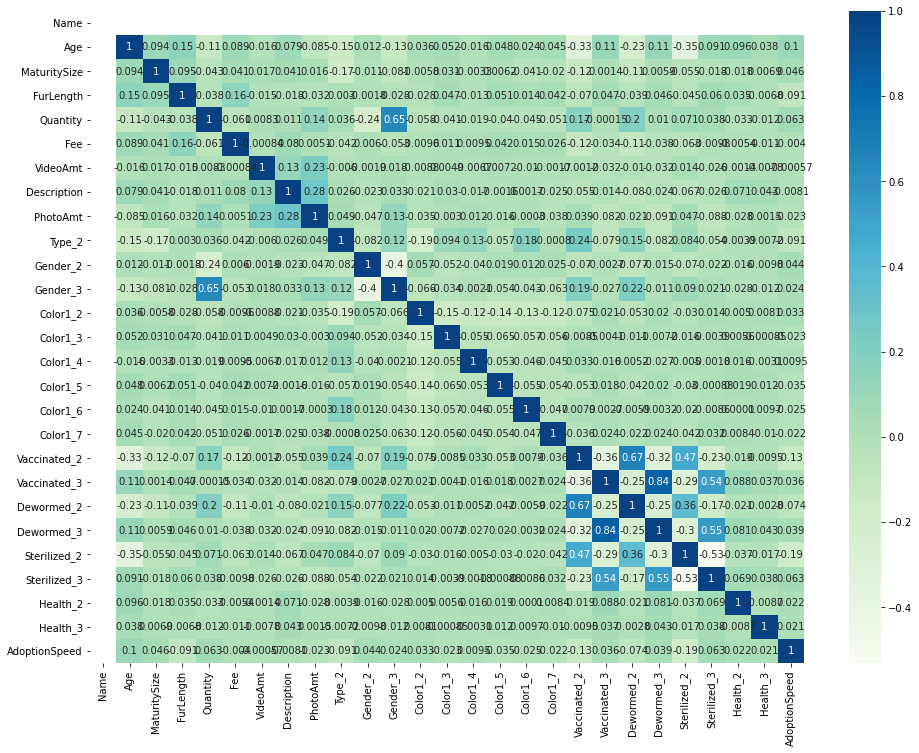

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

pearson_corr_matrix=df.corr()
plt.figure(figsize=(16,12))
sns.heatmap(data=pearson_corr_matrix,annot=True,cmap="GnBu")

In [26]:
target="AdoptionSpeed"
candidates=pearson_corr_matrix[target][(pearson_corr_matrix[target]>=0.1)|(pearson_corr_matrix[target]<=-0.1)]
to_drop=set(pearson_corr_matrix[target].index)-set(candidates.index)
candidates_df=pearson_corr_matrix.drop(index=to_drop,columns=to_drop)

skip = [target]
accept = []

for entry in candidates_df.index:
    if entry not in skip and entry not in accept:
        # get a series from dataframe using 'entry' as index
        similar_to_entry_s = candidates_df.loc[entry]

        similar_to_entry_s = similar_to_entry_s[(similar_to_entry_s >= 0.6)]


        similar_to_target_s = candidates_df.loc[similar_to_entry_s.index][target]

        # idxmax() to get the feature name that is most correlated with 'AdoptionSpeed'
        top_feature = similar_to_target_s.abs().idxmax()

        # accept the feature with max correlation against 'mpg'
        accept.append(top_feature)

        # discard other features in 'similar_to_entry_s'
        skip += set(similar_to_entry_s.index) - {top_feature}

print('Selected Features =', accept)

Selected Features = ['Age', 'Vaccinated_2', 'Sterilized_2']


In [27]:
x=df[['Age', 'Vaccinated_2', 'Sterilized_2']]
y = df['AdoptionSpeed']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x, y, random_state = 42)

from sklearn.linear_model import LinearRegression

linReg = LinearRegression()

linReg.fit(X_train, y_train)

# print the intercept and coefficients
print(linReg.intercept_)
print(linReg.coef_)
print(linReg.score(X_train, y_train))



0.6977829012827996
[ 0.13927807 -0.02336072 -0.09383745]
0.03546707089540213


In [28]:
y_pred = linReg.predict(X_train) 
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_train, y_pred) )
print(r2_score(y_train, y_pred) )

0.08310924722273137
0.03546707089540213


In [32]:
import pickle

with open('adoption_speed.model', 'wb') as f:
    pickle.dump(linReg, f)


In [ ]:
X_train.shape

In [29]:
x=df.iloc[:,:-1]
y = df['AdoptionSpeed']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x, y, random_state = 42)

from sklearn.linear_model import LinearRegression

linReg = LinearRegression()

linReg.fit(X_train, y_train)

# print the intercept and coefficients
print(linReg.intercept_)
print(linReg.coef_)
print(linReg.score(X_train, y_train))

0.7173451402144081
[ 1.29469302e-14  1.94680958e-01  6.85599450e-02 -1.00979477e-01
  2.90345018e-01 -2.90043349e-03  1.23134366e-01 -1.43615066e-01
 -4.47093347e-02 -3.31329709e-02  3.24993308e-02  2.31308697e-02
  5.21322361e-03 -2.65139826e-02  2.59549010e-02 -5.43094590e-02
 -1.46603712e-02 -3.36110455e-02 -3.14287195e-02 -2.38082741e-02
  3.41727939e-03  4.05199961e-04 -1.04201728e-01 -2.37612605e-02
  3.86910668e-02  1.17226050e-01]
0.06809098836799843


In [30]:
from sklearn.metrics import accuracy_score
y_pred = linReg.predict(X_train) 
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_train, y_pred) )
print(r2_score(y_train, y_pred) )

0.08029819832974955
0.06809098836799843
